In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
survey = 'activity.csv'
smoke_aqi = 'annual_data.csv'
state_park = 

directory = r'C:\Users\clark.roll\python coding\code_personal\Data512\Course Project\Part 2\dataset'

# Full paths for each file
survey_path = os.path.join(directory, survey)
smoke_path = os.path.join(directory, smoke_aqi)
parks_path = 

# load dataframes
survey_df = pd.read_csv(survey_path)
smoke_df = pd.read_csv(smoke_path)

In [3]:
# lets explore the survey data
survey_df.columns

Index(['participant_id', 'survey_type', 'outside_activity_engagement',
       'outside_activity_frequency', 'days_checked_for_smoke_info',
       'reduced_outdoor_activities_due_to_smoke',
       'consecutive_days_reduced_outdoor_activity', 'min_aqi_reduce_activity',
       'min_aqi_eliminate_activity',
       'motivating_info_to_reduce_outdoor_activity'],
      dtype='object')

Lets remap some of the column entries so they will be more reasonable labels for a plot

In [4]:
activity_frequency_mapping = {
    'A few times per week': '~3 per week',
    'Once per week':        '~1 per week',
    'Less than once per week, but more than once per month': '~1-3 per month',
    'Rarely – A few times during the summer': '~1-3 per summer'}


# Update values in 'min_aqi_reduce_activity' and 'min_aqi_eliminate_activity' columns based on the given mappings
aqi_mapping = {
    'Green – Good': '0-50: Good',
    'Yellow – Moderate': '51-100: Moderate',
    'Orange – Unhealthy for Sensitive Groups': '101-150: Unhealthy for Sensitive Grps.',
    'Red – Unhealthy': '151-200: Unhealthy',
    'Purple – Very Unhealthy': '201-300: Very Unhealthy',
    'Maroon – Hazardous': '301+ : Hazardous'}

In [5]:
# Apply the mappings to the relevant columns
survey_df['outside_activity_frequency']  = survey_df['outside_activity_frequency'].replace(activity_frequency_mapping)
survey_df['min_aqi_reduce_activity'] = survey_df['min_aqi_reduce_activity'].replace(aqi_mapping)
survey_df['min_aqi_eliminate_activity'] = survey_df['min_aqi_eliminate_activity'].replace(aqi_mapping)

In [6]:
sns.set_style("whitegrid")

How did people respond to whether they would reduce their outdoor activity due to smoke?

In [ ]:
ax.bar_label(ax.containers[0], fontsize=10)

In [12]:
freq_df['reduced_outdoor_activities_due_to_smoke'].unique()

array(['No', 'Yes', 'Not applicable'], dtype=object)

In [20]:
# Clean the data by dropping NaN entries in `outside_activity_frequency`
freq_df = survey_df[['outside_activity_frequency', 'reduced_outdoor_activities_due_to_smoke']].copy()
freq_df = freq_df.dropna()
freq_df = freq_df[freq_df['reduced_outdoor_activities_due_to_smoke'] != 'Not applicable']

reduced_outdoor_activities_due_to_smoke
Yes    72.385142
No     27.614858
Name: proportion, dtype: float64


C:\Users\clark.roll\AppData\Local\Temp\ipykernel_25164\3664326758.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts()[index]
C:\Users\clark.roll\AppData\Local\Temp\ipykernel_25164\3664326758.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts()[index]


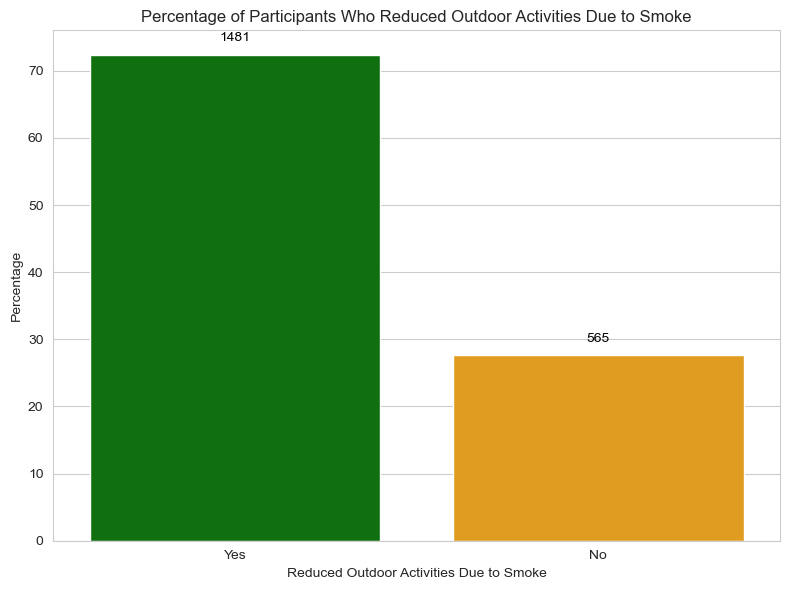

In [31]:
# Calculate the percentage of each unique value in a specific column ('reduced_outdoor_activities_due_to_smoke')
percentage_counts = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts(normalize=True) * 100

# Display the percentage counts
print(percentage_counts)

# Plot the percentages using a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=percentage_counts.index, 
    y=percentage_counts.values, 
    hue=percentage_counts.index,
    palette={'No': 'orange', 'Yes': 'green'},
    legend=False
)

# Add count labels on top of the bars
for index, value in enumerate(percentage_counts.values):
    count = freq_df['reduced_outdoor_activities_due_to_smoke'].value_counts()[index]
    ax.text(index, value + 2, f'{count}', color='black', ha="center")

# Set labels and title
plt.xlabel('Reduced Outdoor Activities Due to Smoke')
plt.ylabel('Percentage')
plt.title('Percentage of Participants Who Reduced Outdoor Activities Due to Smoke')

# Save the plot as an image
plt.tight_layout()
plt.savefig('reduced_outdoor_activities_percentage_with_counts.png')
plt.show()

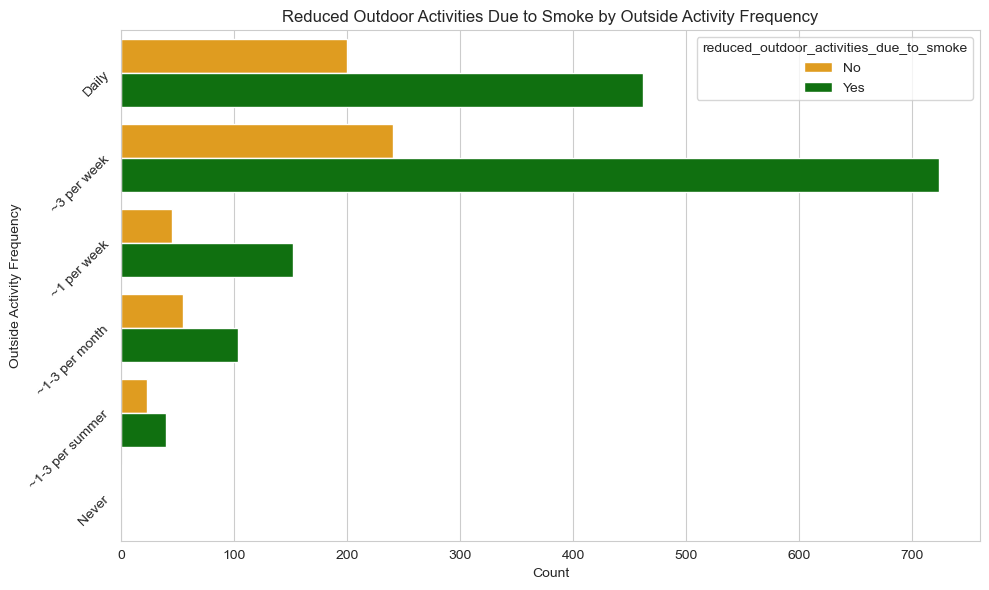

In [32]:
# Clean the data by dropping NaN entries in `outside_activity_frequency`
feq_df = survey_df[['outside_activity_frequency', 'reduced_outdoor_activities_due_to_smoke']].copy()
feq_df.dropna()

# Filter out rows with 'NaN' values and 'Not applicable' in 'reduced_outdoor_activities_due_to_smoke'
valid_responses = ['No', 'Yes']
feq_df = feq_df[feq_df['reduced_outdoor_activities_due_to_smoke'].isin(valid_responses)]

# Set up the figure and plot using seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(
    y='outside_activity_frequency',
    hue='reduced_outdoor_activities_due_to_smoke',
    data=feq_df,
    palette={'No': 'orange', 'Yes': 'green'}
)

# Set labels and title
plt.ylabel('Outside Activity Frequency')
plt.xlabel('Count')
plt.title('Reduced Outdoor Activities Due to Smoke by Outside Activity Frequency')

# Rotate x-axis labels for better readability
plt.yticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
feq_df = feq_df.sort_values("reduced_outdoor_activities_due_to_smoke", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

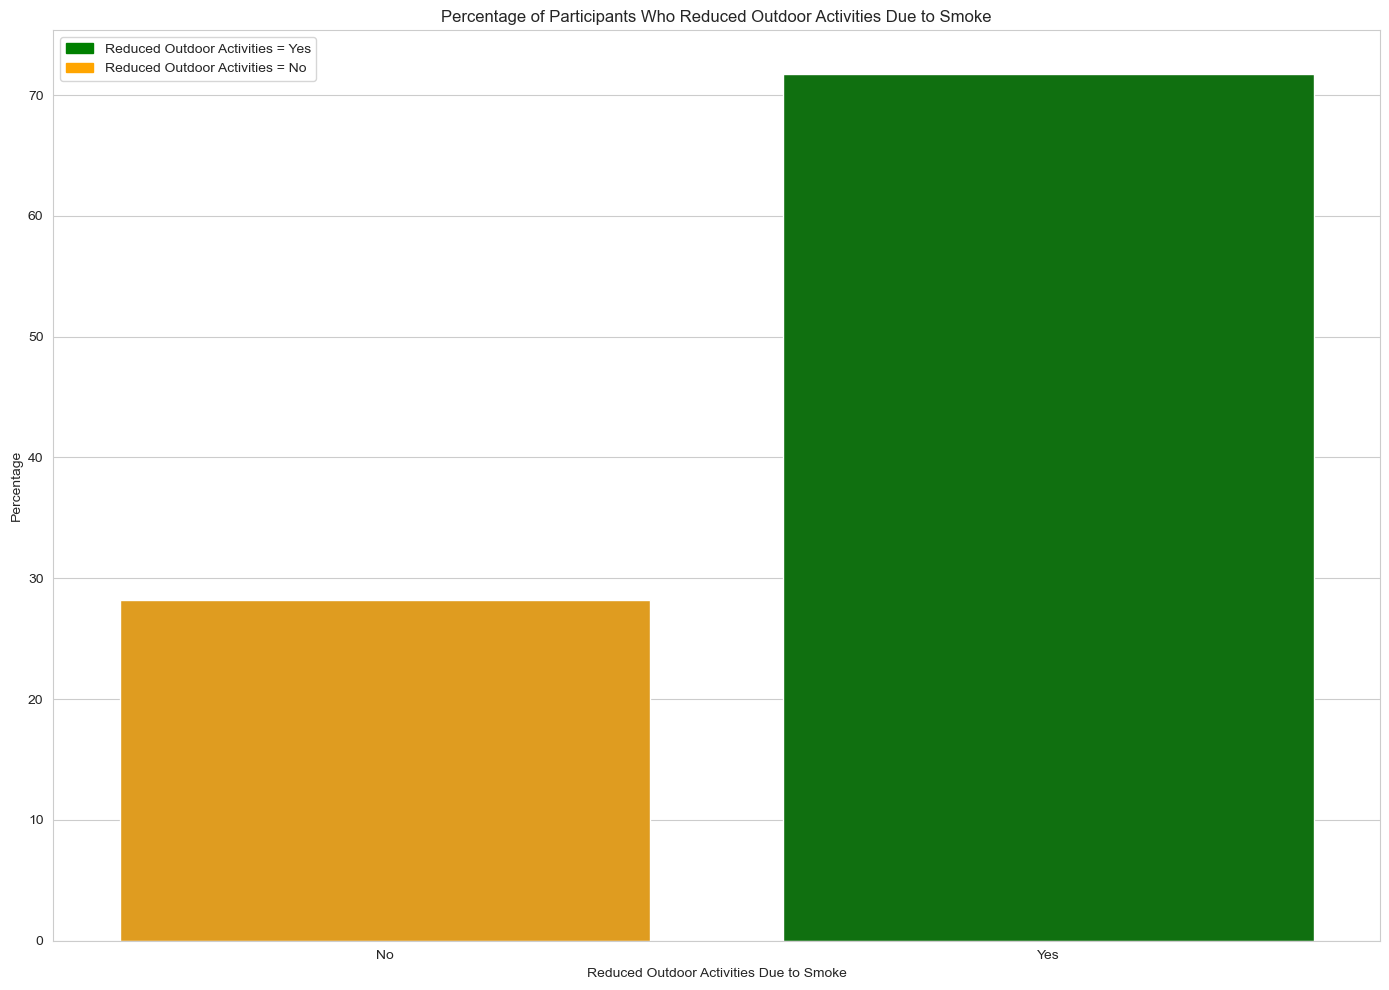

In [13]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Calculate the total number of responses
total_responses = feq_df['reduced_outdoor_activities_due_to_smoke'].value_counts().reset_index()
total_responses.columns = ['reduced_outdoor_activities_due_to_smoke', 'count']

# Calculate the percentage of 'Yes' and 'No' responses
df_percentage = feq_df['reduced_outdoor_activities_due_to_smoke'].value_counts(normalize=True).reset_index()
df_percentage.columns = ['reduced_outdoor_activities_due_to_smoke', 'percentage']
df_percentage['percentage'] *= 100

# Bar chart for 'No' -> Bottom bars
bar1 = sns.barplot(
    x='reduced_outdoor_activities_due_to_smoke', 
    y='percentage', 
    data=df_percentage[df_percentage['reduced_outdoor_activities_due_to_smoke'] == 'No'],
    color='orange',
    label='Reduced Outdoor Activities = No'
)

# Bar chart for 'Yes' -> Top bars
bar2 = sns.barplot(
    x='reduced_outdoor_activities_due_to_smoke', 
    y='percentage', 
    data=df_percentage[df_percentage['reduced_outdoor_activities_due_to_smoke'] == 'Yes'],
    color='green',
    label='Reduced Outdoor Activities = Yes'
)

# Add legend
top_bar = mpatches.Patch(color='green', label='Reduced Outdoor Activities = Yes')
bottom_bar = mpatches.Patch(color='orange', label='Reduced Outdoor Activities = No')
plt.legend(handles=[top_bar, bottom_bar])

# Set labels and title
plt.xlabel('Reduced Outdoor Activities Due to Smoke')
plt.ylabel('Percentage')
plt.title('Percentage of Participants Who Reduced Outdoor Activities Due to Smoke')

# Show the graph
plt.tight_layout()
plt.show()

In [10]:
# Filter data for those who said "Yes" to reducing outdoor activities due to smoke
df_yes_reduced = survey_df[survey_df['reduced_outdoor_activities_due_to_smoke'] == 'Yes']

C:\Users\clark.roll\AppData\Local\Temp\ipykernel_16032\3824567637.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


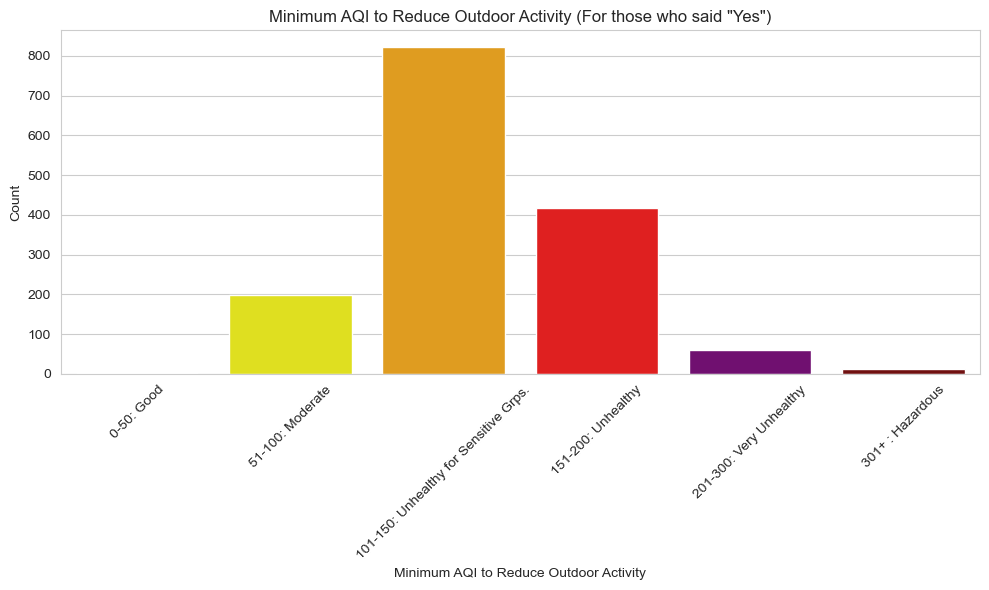

C:\Users\clark.roll\AppData\Local\Temp\ipykernel_16032\3824567637.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


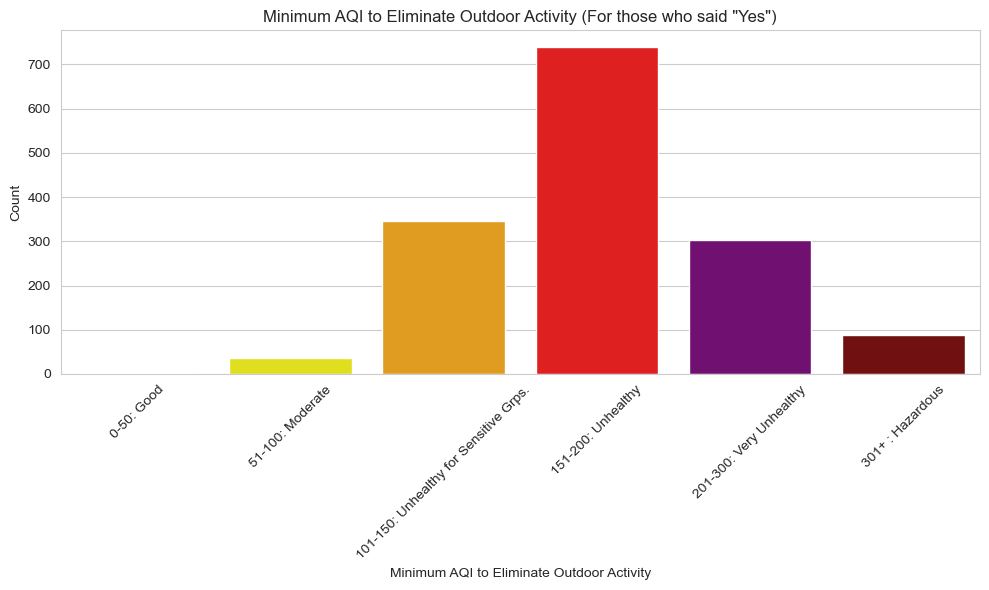

In [11]:
# Define the order for the AQI categories
aqi_order = [
    '0-50: Good', '51-100: Moderate', '101-150: Unhealthy for Sensitive Grps.',
    '151-200: Unhealthy', '201-300: Very Unhealthy', '301+ : Hazardous'
]

# Define custom color map for the categories
custom_palette = {
    '0-50: Good': 'green',
    '51-100: Moderate': 'yellow',
    '101-150: Unhealthy for Sensitive Grps.': 'orange',
    '151-200: Unhealthy': 'red',
    '201-300: Very Unhealthy': 'purple',
    '301+ : Hazardous': 'maroon'
}

# Plot for 'min_aqi_reduce_activity' if column exists
if 'min_aqi_reduce_activity' in df_yes_reduced.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        x='min_aqi_reduce_activity',
        data=df_yes_reduced,
        order=aqi_order,
        palette=custom_palette
    )
    
    # Set labels and title for min_aqi_reduce_activity plot
    plt.xlabel('Minimum AQI to Reduce Outdoor Activity')
    plt.ylabel('Count')
    plt.title('Minimum AQI to Reduce Outdoor Activity (For those who said "Yes")')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot and save figure
    plt.tight_layout()
    plt.savefig('min_aqi_reduce_activity.png')
    plt.show()

# Plot for 'min_aqi_eliminate_activity' if column exists
if 'min_aqi_eliminate_activity' in df_yes_reduced.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        x='min_aqi_eliminate_activity',
        data=df_yes_reduced,
        order=aqi_order,
        palette=custom_palette
    )
    
    # Set labels and title for min_aqi_eliminate_activity plot
    plt.xlabel('Minimum AQI to Eliminate Outdoor Activity')
    plt.ylabel('Count')
    plt.title('Minimum AQI to Eliminate Outdoor Activity (For those who said "Yes")')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot and save figure
    plt.tight_layout()
    plt.savefig('min_aqi_eliminate_activity.png')
    plt.show()

df_yes_reduced['min_aqi_eliminate_activity'].unique()

### OKay now lets put this data in perspective with our historic AQI data and smoke prediction model

Steps to Predict Reduced Visitations

Combine AQI and Survey Data:

Determine the percentage of days per year where AQI exceeds min_aqi_reduce_activity and min_aqi_eliminate_activity.
Map survey thresholds to AQI observations for each time period.
Estimate Reduction Factors:

Calculate potential reduction in visits:
Reduction Factor = p_reduce * (days_reduce / total_days) + p_eliminate * (days_eliminate / total_days)
p_reduce and p_eliminate can be tuned based on survey insights or assumed values (e.g., 50% reduction for "reduce" and 100% for "eliminate").